In [17]:
from skimage.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


np.random.seed(666)
np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=10)
"""
   algo:表示训练模型，可以是线性回归，多项式等。
"""
def plot_learning_curve(algo, x_train, x_test, y_train, y_test):

    train_score = []
    test_score = []
    for i in range(1, len(x_train)+1):
        algo.fit(x_train[:i], y_train[:i])

        y_train_predict = algo.predict(x_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))

        y_test_predict = algo.predict(x_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))

    plt.plot([i for i in range(1, len(x_train)+1)], np.sqrt(train_score), label='train')
    plt.plot([i for i in range(1, len(x_train)+1)], np.sqrt(test_score), label='test')
    plt.legend()
    plt.axis([0, len(x_train)+1, 0, 4])
    plt.show()



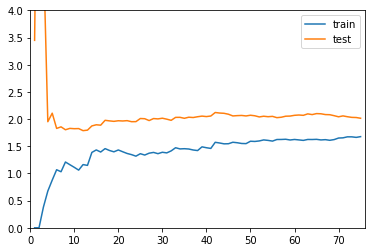

In [18]:
plot_learning_curve(LinearRegression(), x_train, x_test, y_train, y_test)

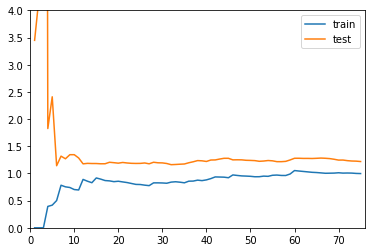

In [19]:
def PolynomialRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scale', StandardScaler()),
        ('lin_reg', LinearRegression())
    ])
poly2_reg = PolynomialRegression(degree=2)
plot_learning_curve(poly2_reg, x_train, x_test, y_train, y_test)

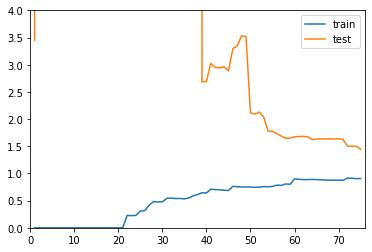

In [20]:
poly2_reg = PolynomialRegression(degree=20)
plot_learning_curve(poly2_reg, x_train, x_test, y_train, y_test)

